# Image classification using the MNIST dataset and Neural Network Analysis

##### An investigation by https://github.com/kamitc

### Introduction

#### The MNIST dataset consists of a series of 70000 greyscale images of handwritten numerals from 0 to 9 and their corresponding label, identifying what number is it. It is a dataset very commonly used for classification analyses and I'll be using a feed-forward neural network to analyze this dataset. I will load the data directly from Keras datasets, so the train and test split has already been established.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

2022-09-18 13:34:53.594497: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### In order to visualize the images I a working with, I have created a 5 x 4 subplot of the first 20 images in the dataset using Pyplot.

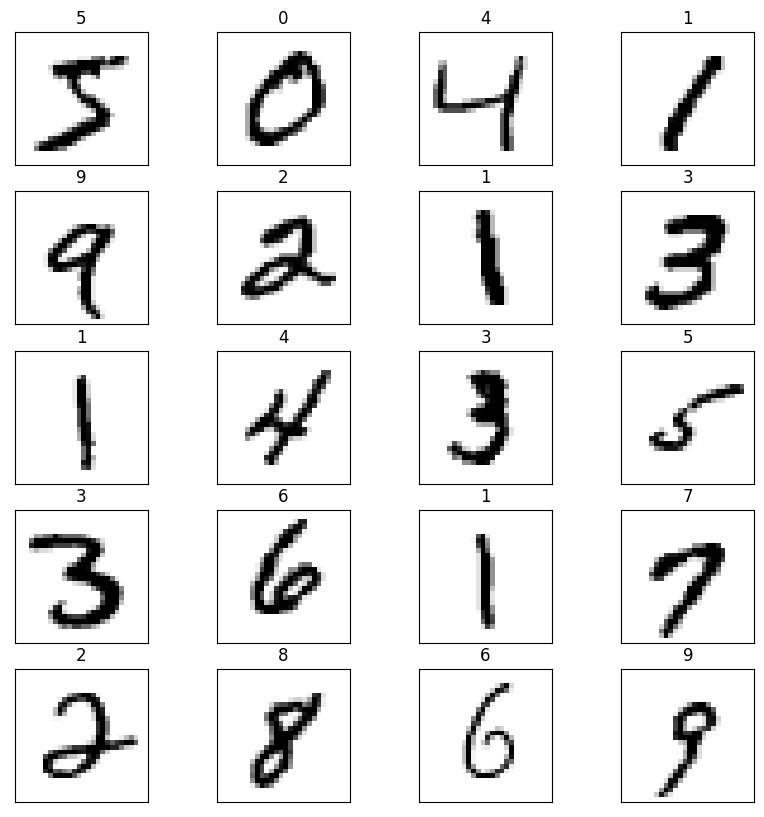

In [2]:
figure = plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5, 4, i + 1, title=train_labels[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)

In [3]:
print("Unique labels =", tf.unique(train_labels))

Unique labels = Unique(y=<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)>, idx=<tf.Tensor: shape=(60000,), dtype=int32, numpy=array([0, 1, 2, ..., 0, 7, 9], dtype=int32)>)


2022-09-18 13:35:42.818210: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### We have 10 unique catgories in our data labels, which correspond to the ten digits from 0 to 9 that are included in the handwriting sample. The MNIST dataset is designed to have 60000 training images and 10000 test images, but we can confirm this below.

In [4]:
num_train = 0
for element in train_images:
    num_train += 1
print("Training images: ", num_train)

num_test = 0
for element in test_images:
    num_test += 1
print("Testing images: ", num_test)

Training images:  60000
Testing images:  10000


In [5]:
print('Train - min:', train_images.min(), 'max:', train_images.max())
print('Test - min:', test_images.min(), 'max:', test_images.max())

Train - min: 0 max: 255
Test - min: 0 max: 255


#### The images have a variation in value from 0 to 255, which could cause problems with the analysis. In order to account for this, we will need to create a basic input pipeline that standardises the images to a range between 0 and 1. We also need to convert our labels into categorical values so they will be correct identified as labels, not integer values.

In [6]:
from tensorflow.keras.utils import to_categorical

def normalise_images(data):
  for image in data:
    return tf.cast(image, tf.float32) / 255.

train_ds = normalise_images(train_images)
test_ds = normalise_images(test_images)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### Based on our work above, we know that there are 10 categories that we need to solve for in our neural network, and our starting data size is an image of 28 x 28 pixels. Therefore, our input layer is going to be 28 x 28, but our output layer will be 10. We need to include enough layers in our model to step down progressively from 784 to 10.

In [40]:
with tf.device('/device:GPU:0'):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#from tensorflow.keras.utils import plot_model
#plot_model(model, show_shapes=True)

#### Model configuration step - input step needs to be flattened to reduce the number of dimensions. Then we can use dense layers to gradually reduce this down to the final output shape of the 10 categories. I have included two hidden layers in order to facilitate this transition using the more robust 'relu' activation function before using 'softmax' for the output layer as it needs to predict a multinomial probability distribution, which is what we have here.

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


### Experiment 1 - 250 Epochs

In [10]:
# Clear previous logs so can record for TensorBoard
# !rm -rf ./logs/ 

# import datetime

# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

with tf.device('/device:GPU:0'):
  history = model.fit(x=train_images, y=train_labels,
                      batch_size=64, 
                      epochs=250,
                      validation_split=0.1)
                      # callbacks=[tensorboard_callback])

Epoch 1/250
844/844 [==============================] - 6s 6ms/step - loss: 1.4705 - accuracy: 0.8252 - val_loss: 0.3736 - val_accuracy: 0.9215
Epoch 2/250
844/844 [==============================] - 5s 6ms/step - loss: 0.3789 - accuracy: 0.9152 - val_loss: 0.2323 - val_accuracy: 0.9433
Epoch 3/250
844/844 [==============================] - 5s 6ms/step - loss: 0.2911 - accuracy: 0.9341 - val_loss: 0.2152 - val_accuracy: 0.9560
Epoch 4/250
844/844 [==============================] - 5s 6ms/step - loss: 0.2469 - accuracy: 0.9441 - val_loss: 0.2529 - val_accuracy: 0.9537
Epoch 5/250
844/844 [==============================] - 5s 6ms/step - loss: 0.2351 - accuracy: 0.9501 - val_loss: 0.2341 - val_accuracy: 0.9542
Epoch 6/250
844/844 [==============================] - 5s 6ms/step - loss: 0.2081 - accuracy: 0.9544 - val_loss: 0.2442 - val_accuracy: 0.9577
Epoch 7/250
844/844 [==============================] - 5s 6ms/step - loss: 0.1996 - accuracy: 0.9600 - val_loss: 0.2842 - val_accuracy: 0.9512

#### As we're going to be using loss and accuracy graphs a bit in this analysis, I created a function to produce these plots easily.

In [20]:
def loss_graph():

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    return plt.show()

def acc_graph():
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'ro', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    return plt.show()


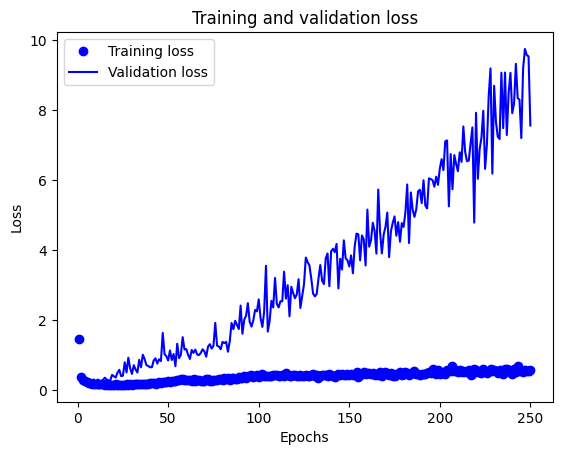

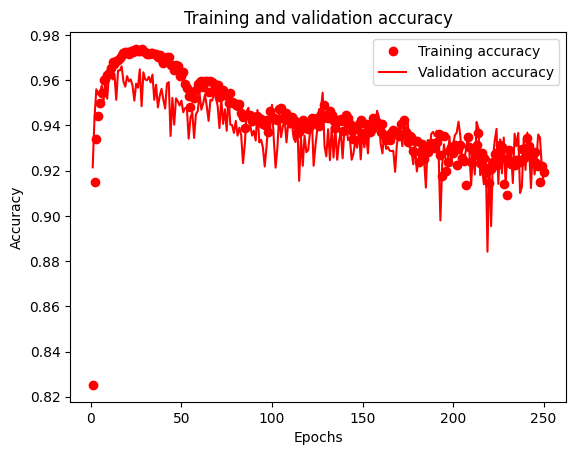

In [17]:
loss_graph()
acc_graph()

#### This initial model appears to have evidence of overfitting, with our training accuracy being much higher than that for the validation. It is quite likely that we don't need as many epochs as we have been running, so I will repeat the experiment with only 50 epochs to compare.

### Experiment 2 - 50 Epochs

In [18]:
# Clear previous logs so can record for TensorBoard
# !rm -rf ./logs/ 

# import datetime

# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

with tf.device('/device:GPU:0'):
  history = model.fit(x=train_images, y=train_labels,
                      batch_size=64, 
                      epochs=50,
                      validation_split=0.1,
                      # callbacks=[tensorboard_callback]
                      )

Epoch 1/50
844/844 [==============================] - 4s 5ms/step - loss: 0.4941 - accuracy: 0.9248 - val_loss: 10.1303 - val_accuracy: 0.9190
Epoch 2/50
844/844 [==============================] - 4s 5ms/step - loss: 0.5771 - accuracy: 0.9277 - val_loss: 8.7057 - val_accuracy: 0.9365
Epoch 3/50
844/844 [==============================] - 4s 5ms/step - loss: 0.5544 - accuracy: 0.9317 - val_loss: 10.4337 - val_accuracy: 0.9317
Epoch 4/50
844/844 [==============================] - 4s 5ms/step - loss: 0.4730 - accuracy: 0.9337 - val_loss: 8.6561 - val_accuracy: 0.9285
Epoch 5/50
844/844 [==============================] - 4s 5ms/step - loss: 0.4676 - accuracy: 0.9283 - val_loss: 9.6920 - val_accuracy: 0.9202
Epoch 6/50
844/844 [==============================] - 4s 5ms/step - loss: 0.5455 - accuracy: 0.9216 - val_loss: 8.0372 - val_accuracy: 0.9167
Epoch 7/50
844/844 [==============================] - 4s 5ms/step - loss: 0.5992 - accuracy: 0.9196 - val_loss: 8.4363 - val_accuracy: 0.9167
Epoc

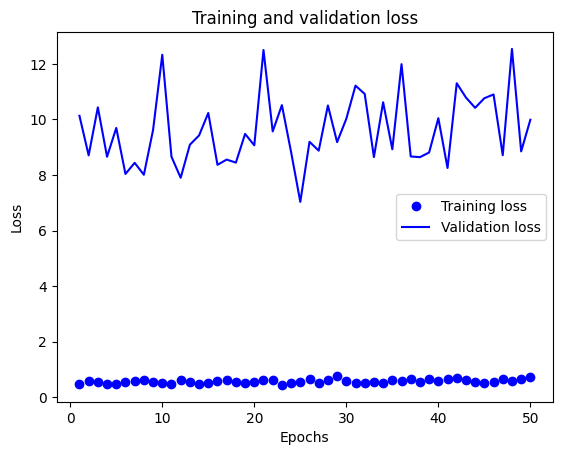

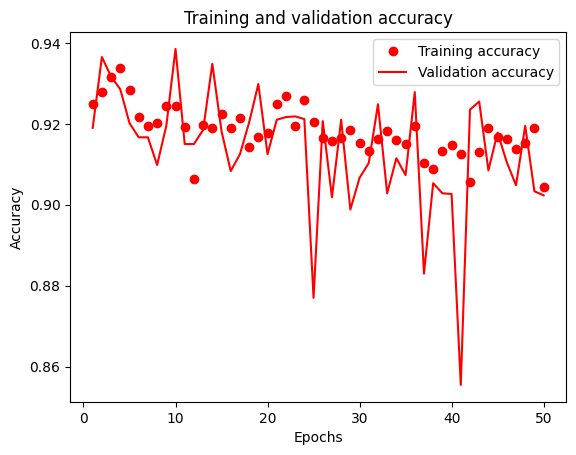

In [21]:
loss_graph()
acc_graph()

#### Reducing the number of epochs does improve the overfitting situation, but now the loss is substantially different between the training and validation. Another option is to reduce the learning rate, which may be necessary considering that we now have fewer epochs.

### Experiment 3 - 50 Epochs and Slower Learning Rate

In [22]:
from tensorflow.keras import optimizers

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(64,activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')])

model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device('/device:GPU:0'):
  history = model.fit(x=train_images, y=train_labels,
                      batch_size=64, 
                      epochs=50,
                      validation_split=0.1)

Epoch 1/50


/Users/home/repos/kamitc/mnist_venv/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


844/844 [==============================] - 7s 6ms/step - loss: 9.6398 - accuracy: 0.7472 - val_loss: 2.0065 - val_accuracy: 0.8858
Epoch 2/50
844/844 [==============================] - 4s 5ms/step - loss: 1.9080 - accuracy: 0.8906 - val_loss: 1.2632 - val_accuracy: 0.9123
Epoch 3/50
844/844 [==============================] - 4s 5ms/step - loss: 1.1805 - accuracy: 0.9167 - val_loss: 1.0019 - val_accuracy: 0.9235
Epoch 4/50
844/844 [==============================] - 4s 5ms/step - loss: 0.8180 - accuracy: 0.9332 - val_loss: 0.8784 - val_accuracy: 0.9300
Epoch 5/50
844/844 [==============================] - 4s 5ms/step - loss: 0.6111 - accuracy: 0.9431 - val_loss: 0.7909 - val_accuracy: 0.9333
Epoch 6/50
844/844 [==============================] - 4s 5ms/step - loss: 0.4664 - accuracy: 0.9521 - val_loss: 0.6967 - val_accuracy: 0.9387
Epoch 7/50
844/844 [==============================] - 4s 5ms/step - loss: 0.3710 - accuracy: 0.9566 - val_loss: 0.6811 - val_accuracy: 0.9398
Epoch 8/50
844/84

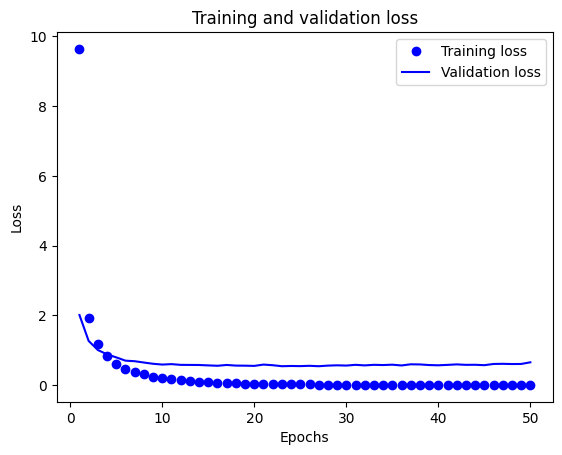

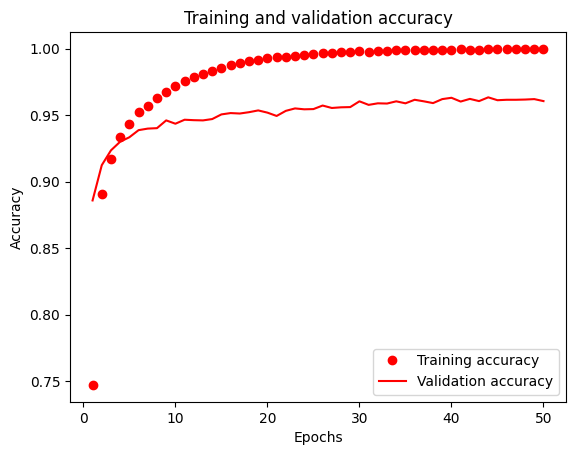

In [23]:
loss_graph()
acc_graph()

#### The validation loss is substantially improved but the overfitting issue is not as good for the accuracy with this model. We can also look at adding batch normalization to the process to try to counter that variation. 

### Experiment 4 - 50 Epochs, Slower Learning Rate and Batch Normalization

In [24]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(64,activation='relu'),
  BatchNormalization(
        momentum=0.95, 
        epsilon=0.005),
  tf.keras.layers.Dense(10,activation='softmax')])

model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device('/device:GPU:0'):
  history = model.fit(x=train_images, y=train_labels,
                      batch_size=64, 
                      epochs=50,
                      validation_split=0.1)

Epoch 1/50
844/844 [==============================] - 7s 7ms/step - loss: 0.6719 - accuracy: 0.8069 - val_loss: 0.2461 - val_accuracy: 0.9383
Epoch 2/50
844/844 [==============================] - 4s 5ms/step - loss: 0.2518 - accuracy: 0.9309 - val_loss: 0.1674 - val_accuracy: 0.9555
Epoch 3/50
844/844 [==============================] - 4s 5ms/step - loss: 0.1819 - accuracy: 0.9487 - val_loss: 0.1334 - val_accuracy: 0.9647
Epoch 4/50
844/844 [==============================] - 4s 5ms/step - loss: 0.1439 - accuracy: 0.9595 - val_loss: 0.1163 - val_accuracy: 0.9703
Epoch 5/50
844/844 [==============================] - 4s 5ms/step - loss: 0.1199 - accuracy: 0.9657 - val_loss: 0.1063 - val_accuracy: 0.9715
Epoch 6/50
844/844 [==============================] - 4s 5ms/step - loss: 0.1003 - accuracy: 0.9710 - val_loss: 0.0980 - val_accuracy: 0.9740
Epoch 7/50
844/844 [==============================] - 4s 5ms/step - loss: 0.0869 - accuracy: 0.9755 - val_loss: 0.0950 - val_accuracy: 0.9738
Epoch 

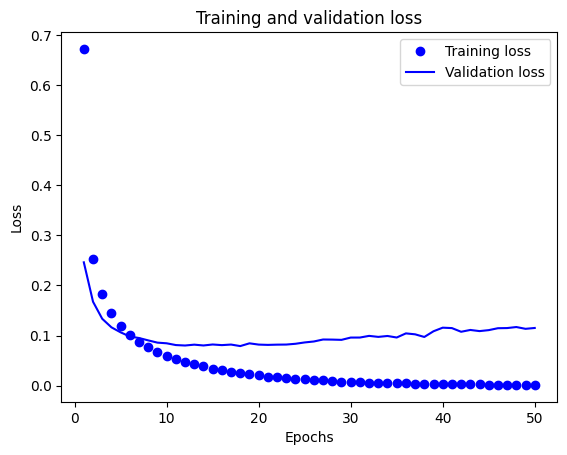

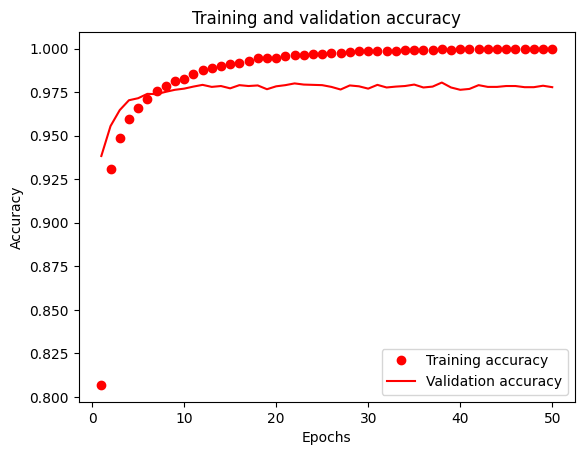

In [25]:
loss_graph()
acc_graph()

#### Adding the batch normalization did significantly improve the loss function, bringing the values below 1 for all epochs. There is still some improvement to be made to the accuracy, with the highest accuracy on novel data levelling out at approximately 97.5% It may be possible that 50 epochs is still too many, and we could easily see the same results after ~ 15. I will run the test again with only 15 epochs and examine the results

### Experiment 5 - 20 Epochs, Slower Learning Rate and Batch Normalization

In [26]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(64,activation='relu'),
  BatchNormalization(
        momentum=0.95, 
        epsilon=0.005),
  tf.keras.layers.Dense(10,activation='softmax')])

model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device('/device:GPU:0'):
  history = model.fit(x=train_images, y=train_labels,
                      batch_size=64, 
                      epochs=20,
                      validation_split=0.1)

Epoch 1/20
844/844 [==============================] - 6s 6ms/step - loss: 0.6679 - accuracy: 0.8049 - val_loss: 0.2484 - val_accuracy: 0.9390
Epoch 2/20
844/844 [==============================] - 5s 6ms/step - loss: 0.2458 - accuracy: 0.9328 - val_loss: 0.1628 - val_accuracy: 0.9597
Epoch 3/20
844/844 [==============================] - 5s 5ms/step - loss: 0.1764 - accuracy: 0.9514 - val_loss: 0.1594 - val_accuracy: 0.9660
Epoch 4/20
844/844 [==============================] - 5s 6ms/step - loss: 0.1388 - accuracy: 0.9614 - val_loss: 0.1375 - val_accuracy: 0.9680
Epoch 5/20
844/844 [==============================] - 6s 8ms/step - loss: 0.1159 - accuracy: 0.9671 - val_loss: 0.1580 - val_accuracy: 0.9705
Epoch 6/20
844/844 [==============================] - 4s 5ms/step - loss: 0.0984 - accuracy: 0.9719 - val_loss: 0.1307 - val_accuracy: 0.9712
Epoch 7/20
844/844 [==============================] - 4s 5ms/step - loss: 0.0852 - accuracy: 0.9758 - val_loss: 0.0938 - val_accuracy: 0.9733
Epoch 

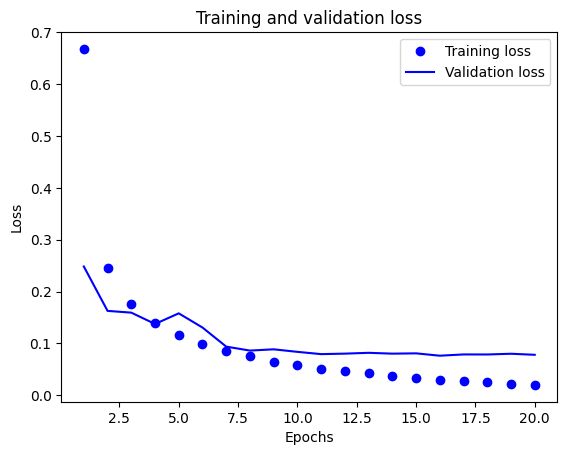

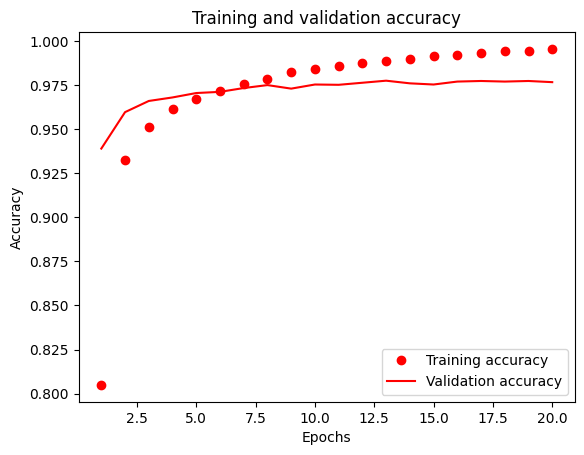

In [27]:
loss_graph()
acc_graph()

In [31]:
loss, acc = model.evaluate(test_images, test_labels, batch_size=64)

157/157 [==============================] - 1s 7ms/step - loss: 0.0837 - accuracy: 0.9755


### Conclusions

#### In this experiment, I used feed-forward neural network analyses to create a classification model that could accurately identify the handwritten numerals of the MNIST dataset and still function well when introduced to new data i.e. was not overfitting. I found that my initial model ran the neural network with far too many epochs, starting with 250 when 20 was actually best. This then required a slower learning rate to not overshoot the optimum when training the model, as well as batch normalization to reduce the inter-batch variation. This allowed my model to achieve a final test accuracy of 97.55% and loss of 0.0837. There are certainly more options I could try to improve the model accuracy, such using augmentation to increase the existing dataset or other techniques I could have implemented, such as transfer learning from existing models. However, for the purposes of this demonstration, I am comfortable with the accuracy I obtained. Overall, the MNIST dataset is great for introductory neural network analyses as it is packaged through Keras and ready to analyze immediately. Because of the standardized packaging, analyses conducted by different parties can be directly compared, allowing different techniques to be examined and built upon. This is invaluable for developing the field and allowing new data scientists to hone their skills. 